https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

# Comprehensive data exploration with Python

In [14]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# 목표가 되는 SalePrice에 대한 데이터 분석을 최우선으로 진행
# .descirbe() 메서드를 통해 해당 컬럼 값의 통계값을 한 번에 확인할 수 있다.
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

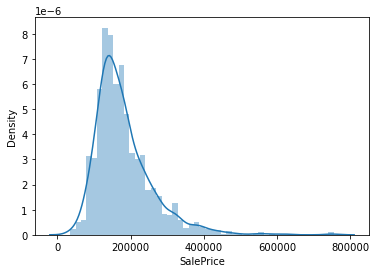

In [ ]:
# histogram - 해당 데이터 값의 분포를 확인하기 위한 가장 기본적인 시각화 방법
sns.distplot(train_df['SalePrice'])

- Skewness 비대칭도(왜도): 분포의 비대칭성을 나타내는 지표, 음수일 경우 왼쪽 긴꼬리, 양수일 경우 오른쪽 긴꼬리
- Kurtosis 첨도: 분포의 꼬리가 두꺼운 정도를 나타내는 지표, 기준값보다 클 경우 위로 뾰족함

In [ ]:
print('Skewness: %f' % train_df['SalePrice'].skew())
print('Kurtosis: %f' % train_df['SalePrice'].kurt())

# 해당 그래프의 왜도, 첨도 값을 보면, 오른쪽으로 꼬리가 길며, 뾰족한 정도는 기준값보다 크므로 정규분포보다 위로 뾰족한 형태

Skewness: 1.882876
Kurtosis: 6.536282


### Other Features

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

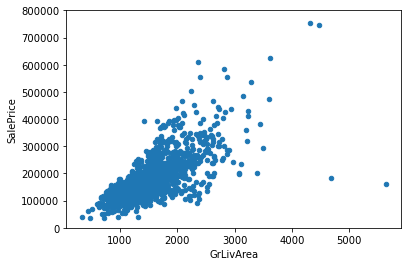

In [ ]:
# 산점도를 통해 변수들 간의 상관관계를 시각화하여 확인할 수 있다.

var = 'GrLivArea'

data = train_df[['SalePrice', var]].copy()
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

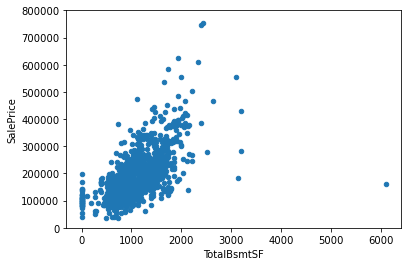

In [ ]:
var = 'TotalBsmtSF'

data = train_df[['SalePrice', var]].copy()
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

(-0.5, 9.5, 0.0, 800000.0)

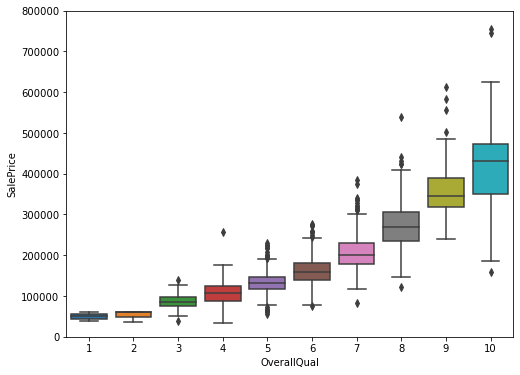

In [ ]:
# Categorical Features
var = 'OverallQual'

data = train_df[['SalePrice', var]].copy()

f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

[]

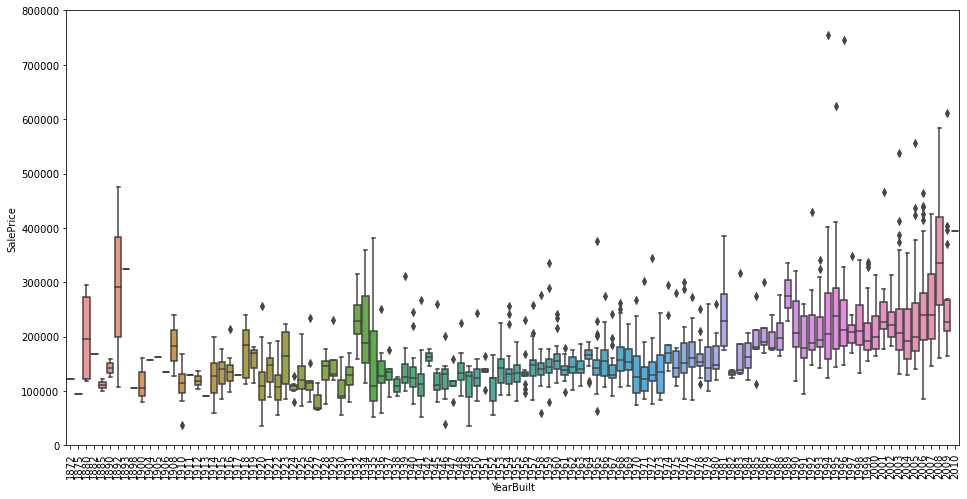

In [ ]:
# Categorical Features
var = 'YearBuilt'

data = train_df[['SalePrice', var]].copy()

f, ax = plt.subplots(figsize = (16, 8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)
plt.plot()

위와 같이 변수들 간의 상관관계를 분석하여, 예측에 유의미한 변수와 무의미한 변수를 구분해내는 것이 매우 중요하다.

하지만 그걸 어떻게 결정할 수 있을까?? 위의 케이스들 같은 경우는 분석가의 주관적 판단으로 선택된 속성들이다.

그렇다면 주관적 판단을 배제하고 전체 변수에 대해서 다 분석을 진행하면 될까? 이 작업의 경우 분석에 사용될 데이터의 속성값이 늘어날 수록 분석에 어려움이 발생할 수 밖에 없다.

이러한 문제를 해결하기 위한 데이터 분석 기법에 대해서 알아보자

### Data Exploratory

<AxesSubplot:>

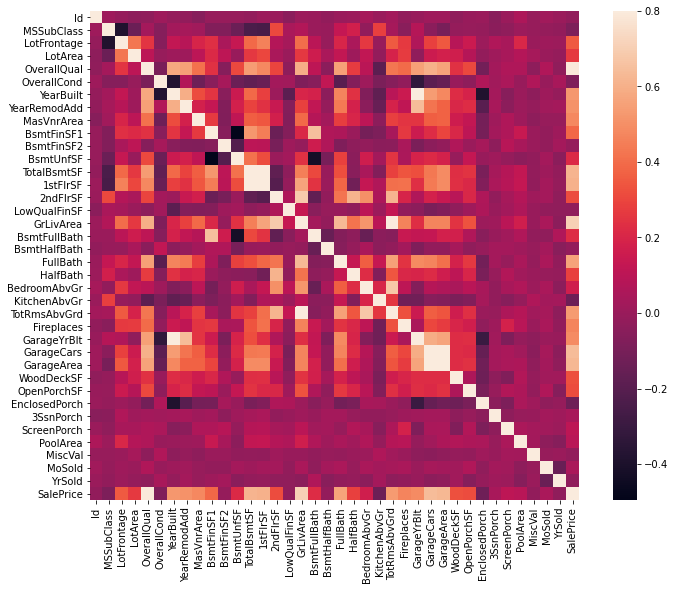

In [ ]:
# correlation matrix
corrmat = train_df.corr()

f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)

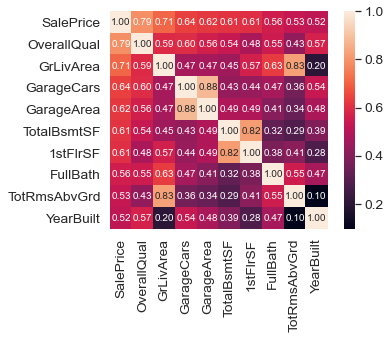

In [ ]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)

plt.show()

In [ ]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

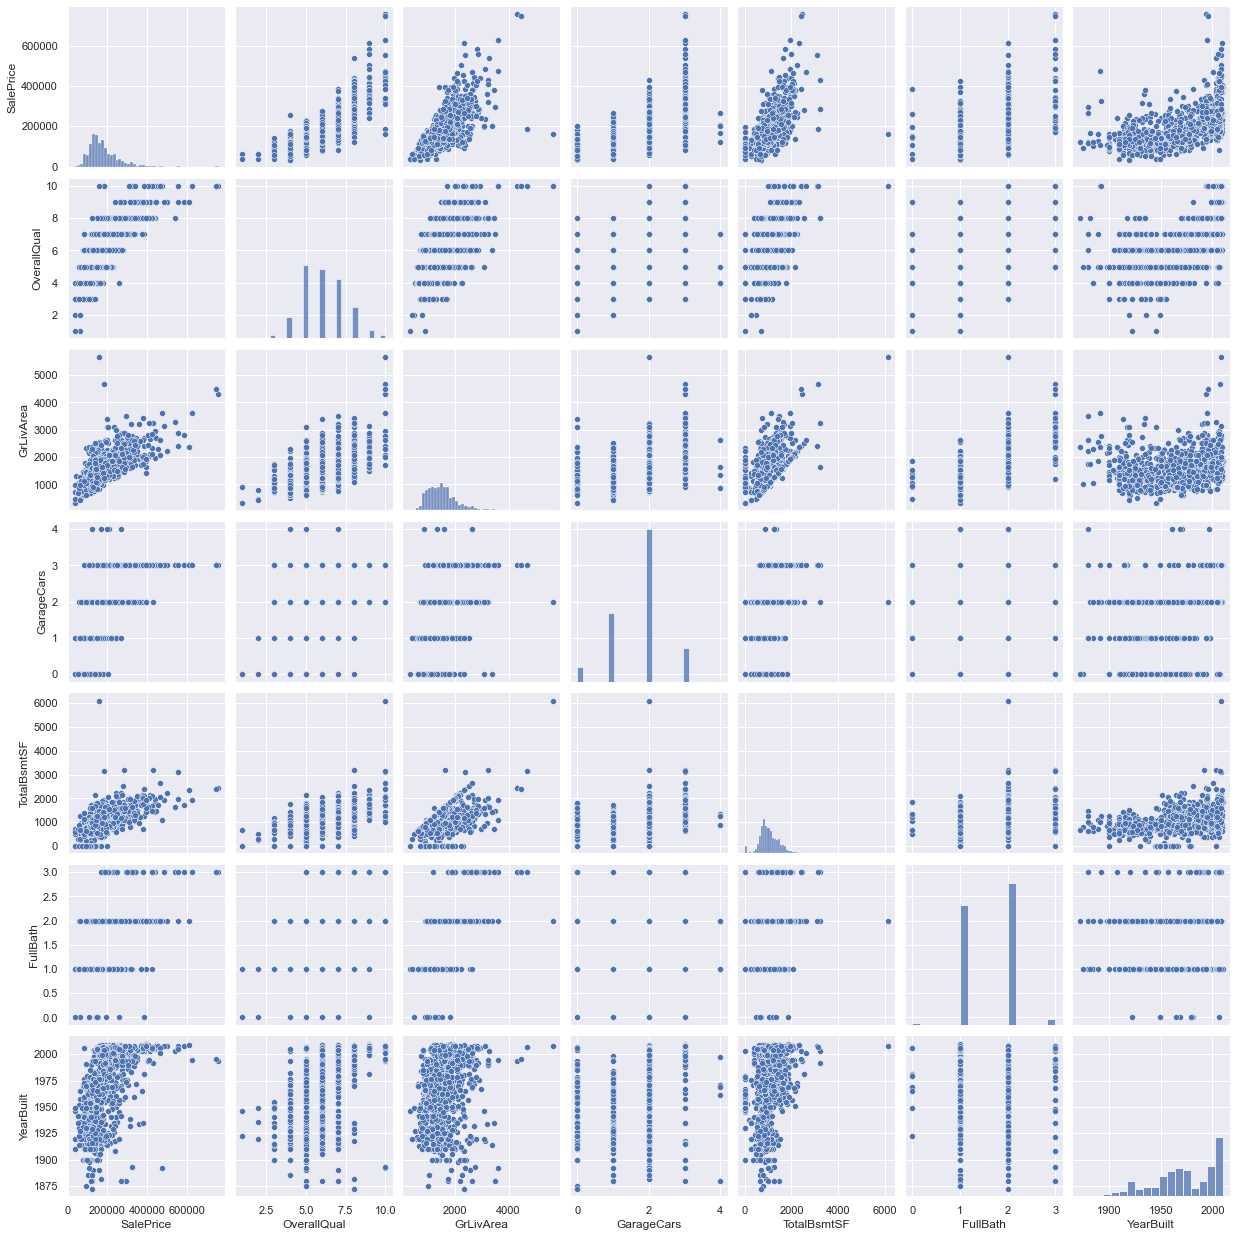

In [ ]:
sns.set()

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.sh

### Missing Data

In [4]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [6]:
train_df = train_df.drop((missing_data.loc[missing_data['Total'] > 1]).index, 1)
train_df = train_df.drop(train_df.loc[train_df['Electrical'].isnull()].index)
train_df.isnull().sum().max()

0

### Outliers

In [7]:
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:, np.newaxis]); # np.newaxis는 무슨 기능일까?
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\n')
print('outer range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]


outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

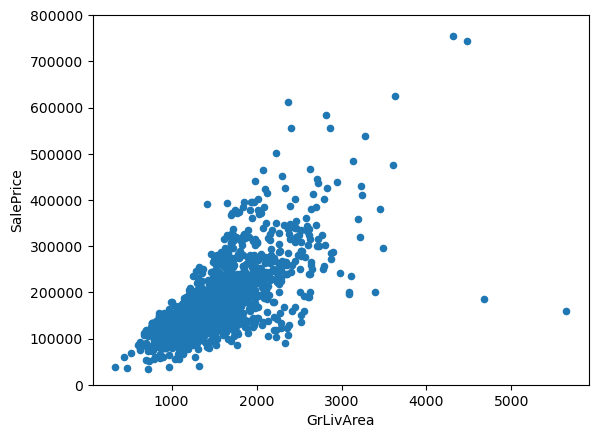

In [8]:
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

In [9]:
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

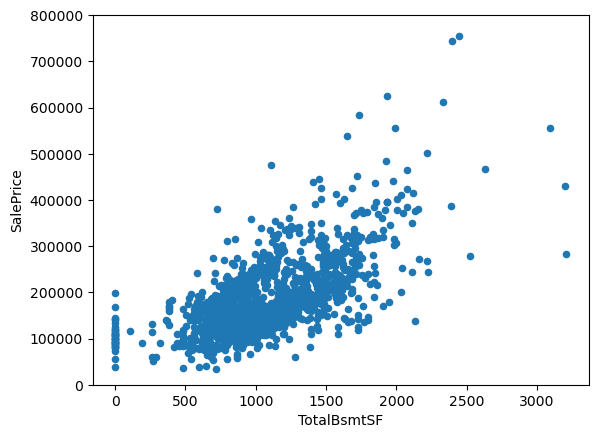

In [12]:
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

### Getting hard core

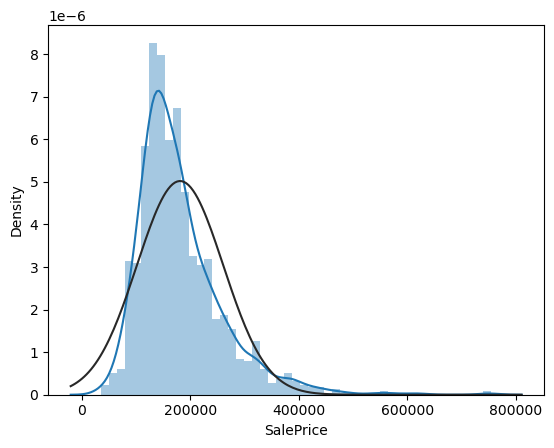

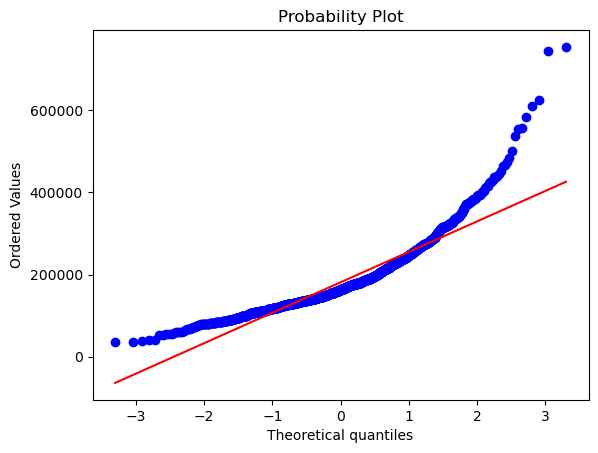

In [15]:
sns.distplot(train_df['SalePrice'], fit = norm)

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot = plt)

In [16]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])

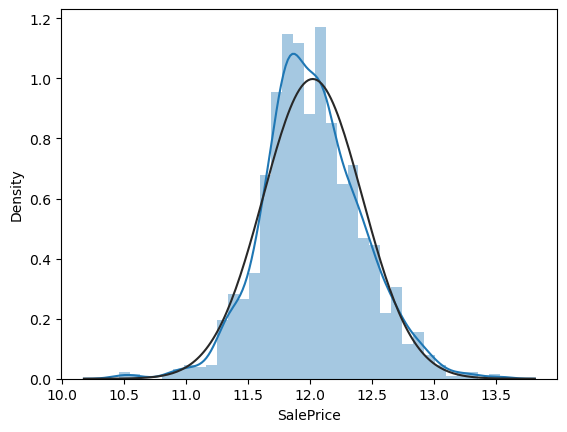

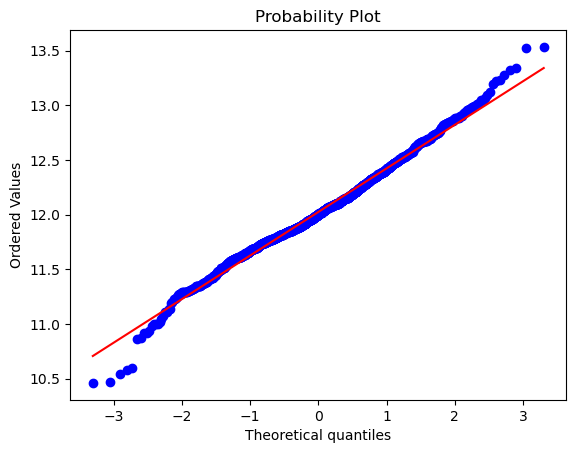

In [19]:
sns.distplot(train_df['SalePrice'], fit = norm)

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot = plt)

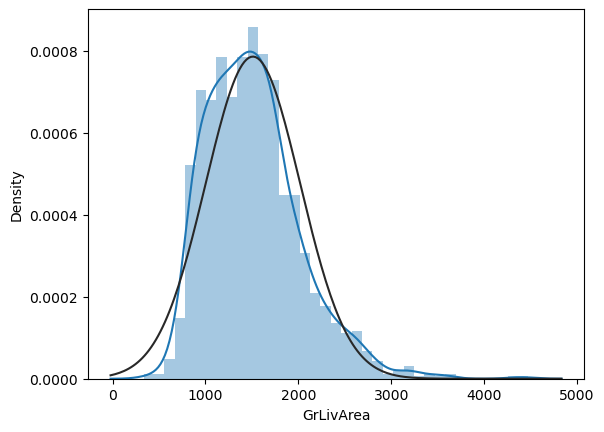

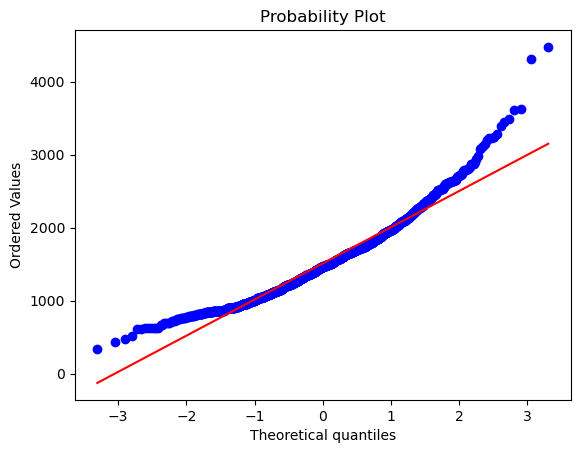

In [20]:
sns.distplot(train_df['GrLivArea'], fit = norm)

fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot = plt)

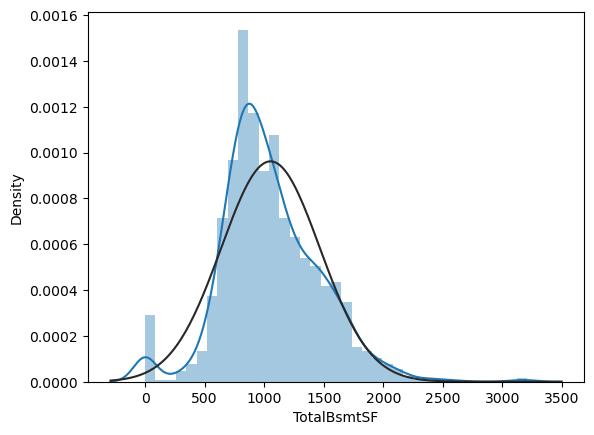

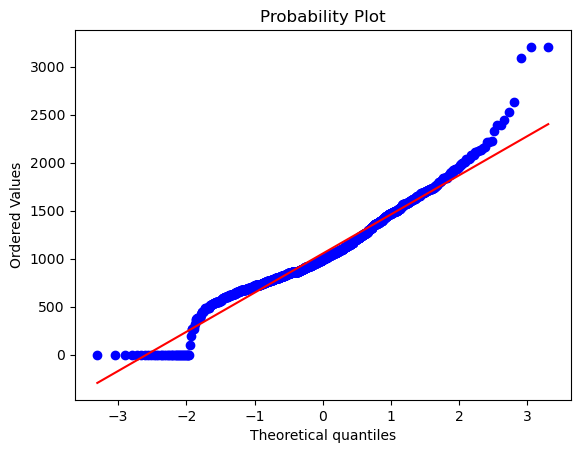

In [21]:
sns.distplot(train_df['TotalBsmtSF'], fit = norm)

fig = plt.figure()
res = stats.probplot(train_df['TotalBsmtSF'], plot = plt)

In [22]:
train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index = train_df.index)
train_df['HasBsmt'] = 0
train_df.loc[train_df['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [25]:
train_df.loc[train_df['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

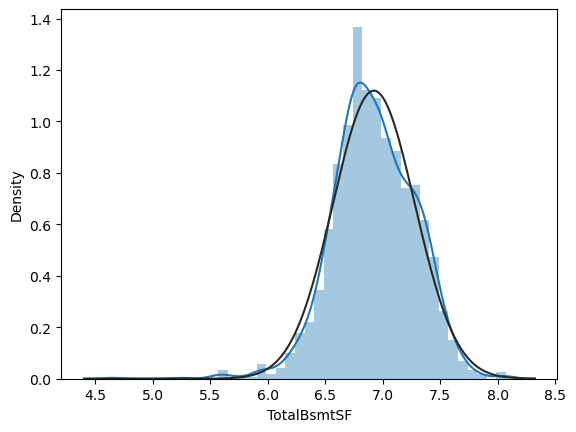

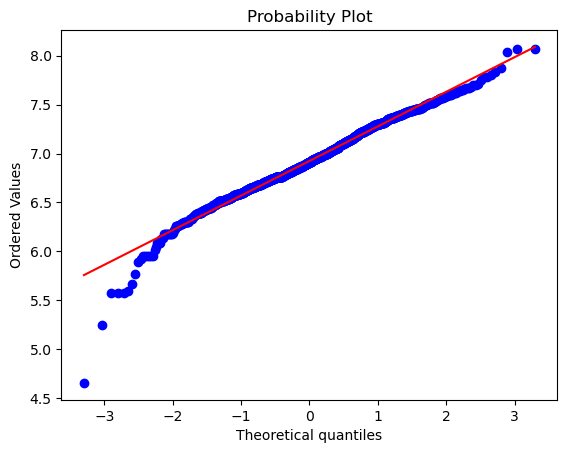

In [30]:
sns.distplot(train_df[train_df['TotalBsmtSF'] > 0]['TotalBsmtSF'],
             fit = norm)

fig = plt.figure()
res = stats.probplot(train_df.loc[train_df['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot = plt)

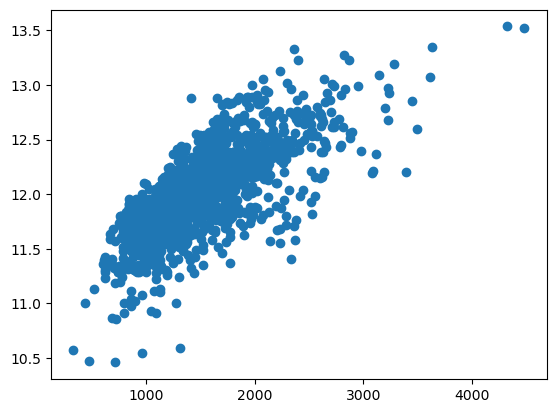

In [31]:
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'])

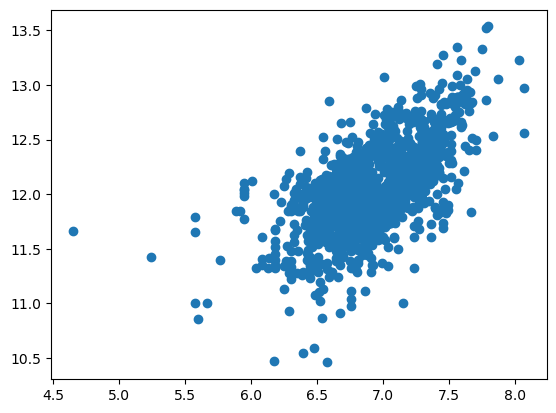

In [32]:
plt.scatter(train_df[train_df['TotalBsmtSF'] > 0]['TotalBsmtSF'],
            train_df[train_df['TotalBsmtSF'] > 0]['SalePrice'])

In [38]:
# pd.get_dummies 기능을 통해 속성값들에 대한 원핫 인코딩 진행

train_df_dummy = pd.get_dummies(train_df)

In [43]:
train_df_dummy[[x for x in train_df_dummy.columns if x[:6] == 'Street']]

,Street_Grvl,Street_Pave
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1455,0,1
1456,0,1
1457,0,1
1458,0,1
